## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
data_df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
data_df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,php,157
2,2008-08-01 00:00:00,ruby,70
3,2008-08-01 00:00:00,c,83
4,2008-08-01 00:00:00,c++,164


In [6]:
data_df.tail()

,m,TagName,Unnamed: 2
2588,2024-02-01 00:00:00,perl,36
2589,2024-02-01 00:00:00,delphi,111
2590,2024-02-01 00:00:00,go,309
2591,2024-02-01 00:00:00,php,1311
2592,2024-02-01 00:00:00,javascript,4790


In [30]:
data_df.rename(columns={
    'm': 'Date',
    'TagName': 'Tag',
    'Unnamed: 2': 'Posts'
}, inplace=True)

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [31]:
data_df.shape

(2593, 3)

In [32]:
# No. of rows
data_df.shape[0]

2593

In [33]:
# No. of columns
data_df.shape[1]

3

**Challenge**: Count the number of entries in each column of the dataframe

In [34]:
data_df.count()

Date     2593
Tag      2593
Posts    2593
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [42]:
data_df.groupby('Tag').sum().sort_values(by='Posts', ascending=False)

,Date,Posts
Tag,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2522340
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2181955
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1913116
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1611568
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1462376
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,804710
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,503506
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,402954
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,332446


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [44]:
data_df.groupby('Tag').count()

,Date,Posts
Tag,,
assembly,187,187
c,187,187
c#,188,188
c++,187,187
delphi,187,187
go,172,172
java,187,187
javascript,187,187
perl,187,187


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [45]:
data_df['Date'] = pd.to_datetime(data_df['Date'])

In [46]:
data_df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,php,157
2,2008-08-01,ruby,70
3,2008-08-01,c,83
4,2008-08-01,c++,164


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [51]:
reshaped_df = data_df.pivot(index='Date', columns='Tag', values='Posts')

In [52]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


In [54]:
reshaped_df.tail()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2023-10-01,172.0,969.0,3182.0,1706.0,165.0,421.0,3413.0,5443.0,53.0,1529.0,8986.0,2063.0,193.0,899.0
2023-11-01,172.0,958.0,3108.0,1469.0,103.0,409.0,3274.0,5185.0,44.0,1397.0,8452.0,1991.0,153.0,864.0
2023-12-01,181.0,876.0,2645.0,1429.0,75.0,326.0,2538.0,4767.0,53.0,1208.0,6999.0,1603.0,154.0,742.0
2024-01-01,176.0,825.0,2687.0,1581.0,89.0,345.0,2864.0,5134.0,34.0,1400.0,7763.0,1808.0,163.0,867.0
2024-02-01,134.0,775.0,2728.0,1461.0,111.0,309.0,2826.0,4790.0,36.0,1311.0,7888.0,1827.0,157.0,676.0


In [56]:
reshaped_df.shape

(188, 14)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [57]:
reshaped_df.count()

Tag
assembly      187
c             187
c#            188
c++           187
delphi        187
go            172
java          187
javascript    187
perl          187
php           187
python        187
r             185
ruby          187
swift         178
dtype: int64

In [58]:
reshaped_df.fillna(0, inplace=True)

In [59]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,604.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0


In [61]:
reshaped_df.isna().sum().sort_values(ascending=False)

Tag
assembly      0
c             0
c#            0
c++           0
delphi        0
go            0
java          0
javascript    0
perl          0
php           0
python        0
r             0
ruby          0
swift         0
dtype: int64

In [64]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

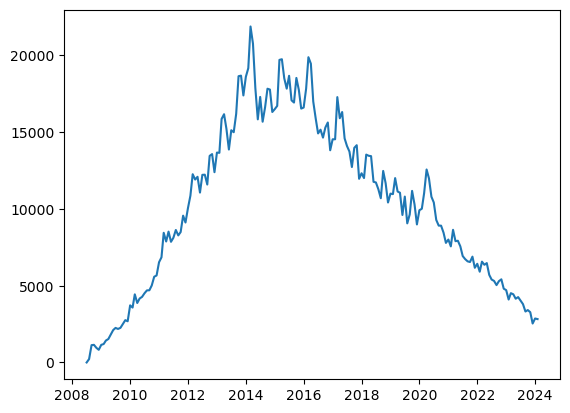

In [69]:
x = reshaped_df.index
y = reshaped_df['java']
plt.plot(x, y);

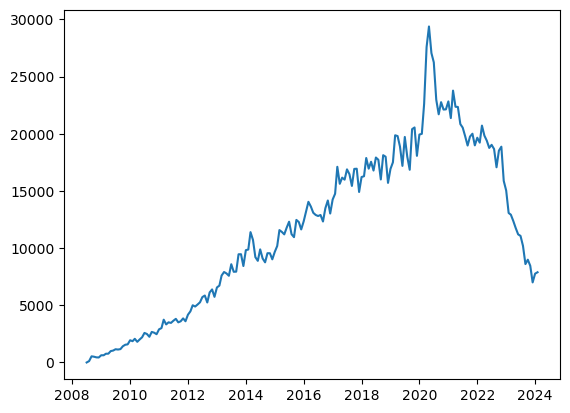

In [70]:
x = reshaped_df.index
y = reshaped_df.python
plt.plot(x, y);

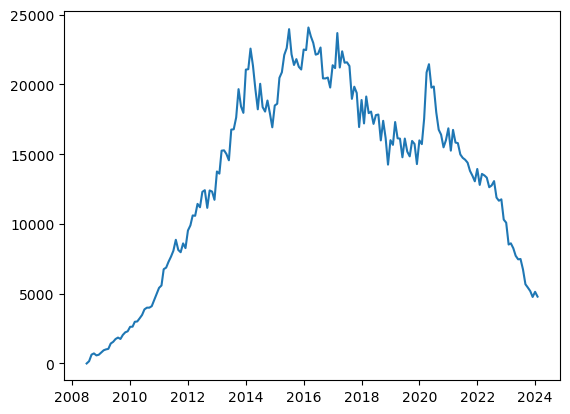

In [74]:
x = reshaped_df.index
y = reshaped_df['javascript']
plt.plot(x, y);

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

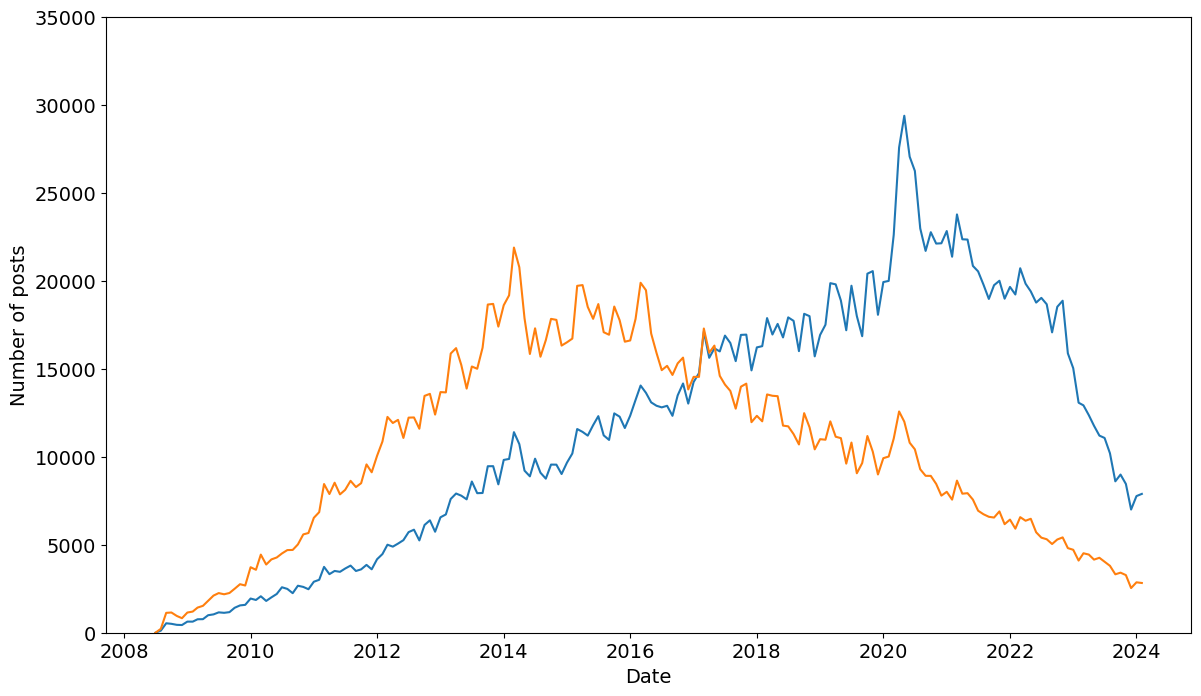

In [82]:
x = reshaped_df.index
y1, y2 = reshaped_df['python'], reshaped_df['java']
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(x, y1)
plt.plot(x, y2);

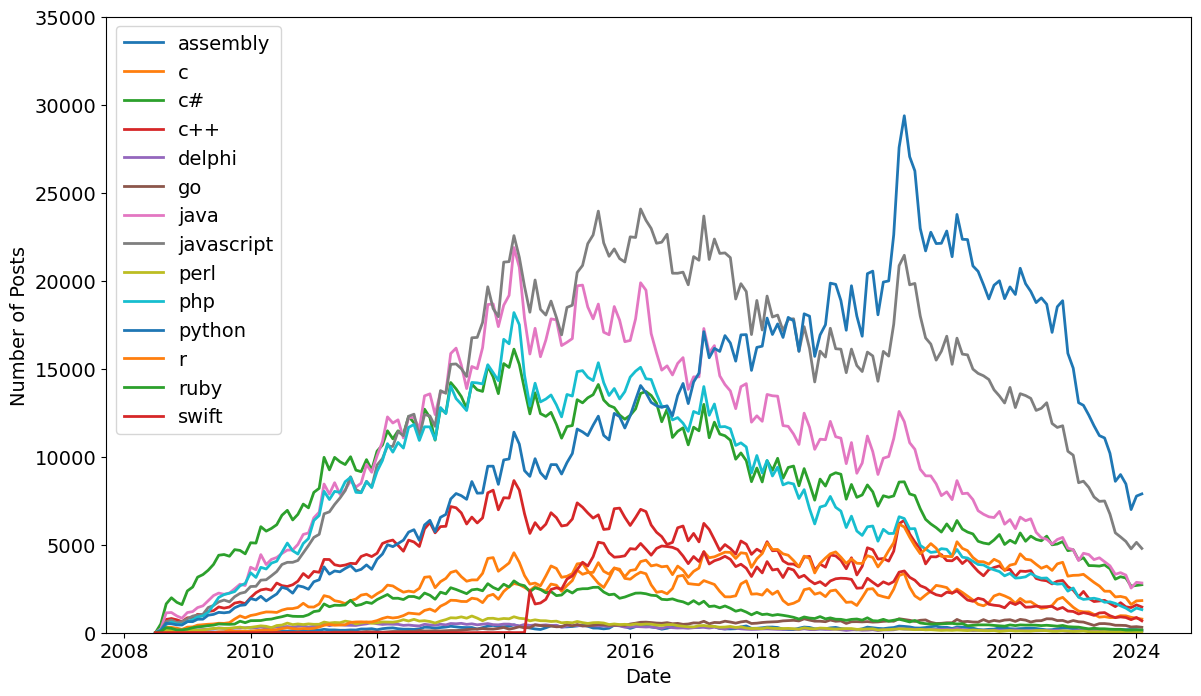

In [96]:
# Get the x-axis value
x = reshaped_df.index

# Set the plot size
plt.figure(figsize=(14, 8))

# Configure the x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Configure the labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Set the y-axis limits
plt.ylim(0, 35000)

# plot multiline chart (all languages)
for lang in reshaped_df.columns:
    plt.plot(
        x, reshaped_df[lang],
        linewidth=2,
        label=reshaped_df[lang].name
    )

# Set the legend
plt.legend(fontsize=14);

In [102]:
# Get the most popular language
pop_lang_row_num = data_df['Posts'].idxmax()
data_df.loc[pop_lang_row_num]

Date     2020-05-01 00:00:00
Tag                   python
Posts                  29373
Name: 1950, dtype: object

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

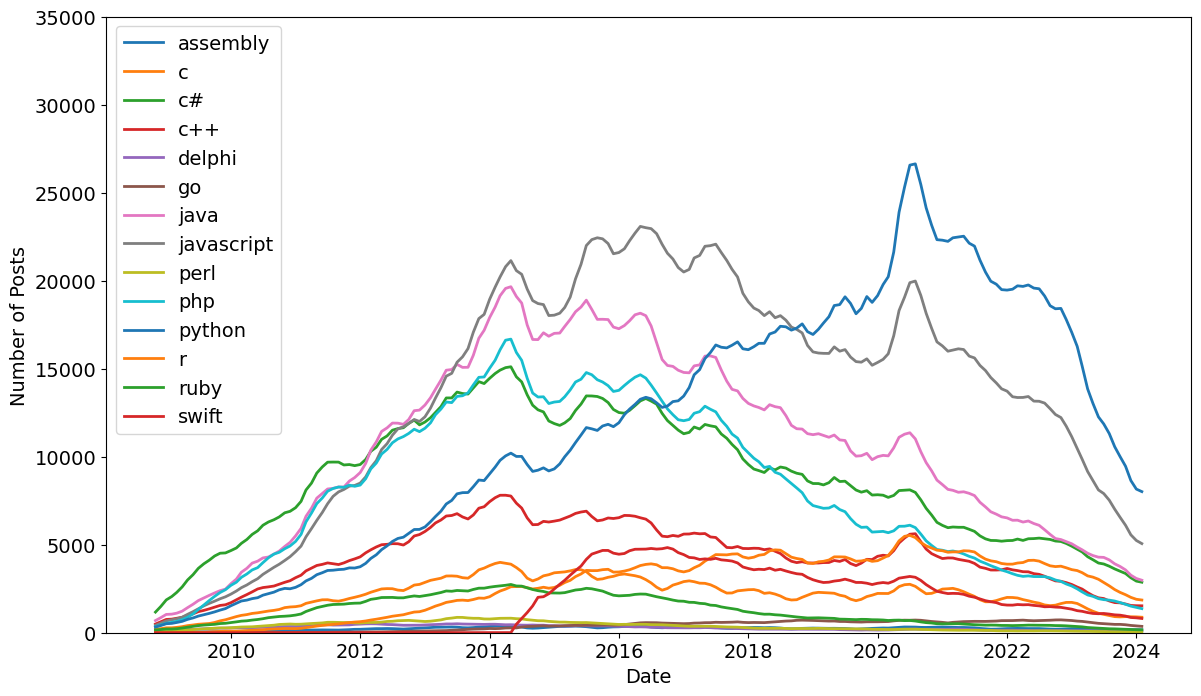

In [108]:
# Set a new rolling dataframe with the windows averaged out
rolling_df = reshaped_df.rolling(window=5).mean()

# Get the x-axis value
x = rolling_df.index

# Set the plot size
plt.figure(figsize=(14, 8))

# Configure the x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Configure the labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Set the y-axis limits
plt.ylim(0, 35000)

# plot multiline chart (all languages)
for lang in rolling_df.columns:
    plt.plot(
        x, rolling_df[lang],
        linewidth=2,
        label=rolling_df[lang].name
    )

# Set the legend
plt.legend(fontsize=14);